In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/res/')
from BySanti import filter

In [3]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data_sets/Entrenamieto_ECI_2020.csv')
filter.full_correction(train)

In [5]:
# empezamos por obtener un DF reducido con los campos de interes
# - Opportunity_ID  (nos permitira agrupar los renglones de la misma oportunidad)
# - ASP / ASP_(converted)_Currency nos permitira obtener un ratio de relacion de 
#   forma de expresar todas las ventas en la misma
#   moneda (USD) y de esta forma al estar poder compararlas
red_op = train[["Region", "ASP", "ASP_(converted)_Currency", "Opportunity_ID", "Stage"]]
red_op.head(5)

,Region,ASP,ASP_(converted)_Currency,Opportunity_ID,Stage
0,EMEA,0.52,USD,0,Closed Lost
1,EMEA,0.53,USD,1,Closed Won
2,Americas,0.48,USD,2,Closed Won
3,Americas,0.53,USD,3,Closed Lost
4,Americas,0.53,USD,4,Closed Lost


In [71]:
# nos enfocamos en un dataset constituido solo por las columnas relevantes
# para el analisis que encaramos
part_train = train[["Region", "Bureaucratic_Code", "Opportunity_ID", "Stage"]]

# agrupamos todos los registros que pertencen a la misma oportunidad
# -> con la hipotesis de que cada renglon que compoaarten la misma Opportunity_ID
#    son parte de la misma oportunidad
grouped_part_train = part_train.groupby(["Region", "Bureaucratic_Code", "Opportunity_ID", "Stage"]).last().reset_index()

# realizamos las operaciones necesarias para obtener el porcentaje de oportunidad
# en cierto Stage relacionado con el Bureaucratic_Code
tot_disc_grouped_part_train  = grouped_part_train.groupby(["Region", "Stage", "Bureaucratic_Code", ])["Stage"].count().to_frame('op_count').reset_index()

tot_grouped_part_train  = tot_disc_grouped_part_train.groupby(["Region"])["op_count"].sum().to_frame('tot_op').reset_index()

merge_df = tot_disc_grouped_part_train.merge(tot_grouped_part_train)

In [102]:
merge_df["op_ratio"] = merge_df.apply (lambda row: round(row["op_count"] / row["tot_op"] * 100, 2), axis=1)
merge_df.loc[(merge_df["Region"] == "Japan")].head(10)

,Region,Stage,Bureaucratic_Code,op_count,tot_op,op_ratio
36,Japan,Closed Lost,1,10,1906,0.52
37,Japan,Closed Lost,2,10,1906,0.52
38,Japan,Closed Lost,4,191,1906,10.02
39,Japan,Closed Lost,5,384,1906,20.15
40,Japan,Closed Won,0,1,1906,0.05
41,Japan,Closed Won,1,6,1906,0.31
42,Japan,Closed Won,2,6,1906,0.31
43,Japan,Closed Won,4,1223,1906,64.17
44,Japan,Closed Won,5,53,1906,2.78
45,Japan,Closed Won,6,1,1906,0.05


In [74]:
# Ahora solo me enfoco en el segmento en el que se completo el proceso con exito
prospects_stage_won = (merge_df.loc[merge_df["Stage"] == 'Closed Won'])
prospects_stage_lost = (merge_df.loc[merge_df["Stage"] == 'Closed Lost'])

In [76]:
# y dispongo la información para visualizarlo en un grafico
pvt_won = prospects_stage_won.pivot_table(values="op_ratio", index="Bureaucratic_Code", columns="Region", aggfunc='mean')
pvt_lost = prospects_stage_lost.pivot_table(values="op_ratio", index="Bureaucratic_Code", columns="Region", aggfunc='mean')
# para el proposito las celdas con valor Nan pueden ser interpretadas con porcentaje igual a 0
#pvt = pvt.fillna(0)

pvt_lost

Region,APAC,Americas,EMEA,Japan,Middle East
Bureaucratic_Code,,,,,
1,1.77,1.79,0.86,0.52,NaN
2,1.29,0.77,0.77,0.52,3.36
3,0.05,NaN,NaN,NaN,NaN
4,26.56,34.44,40.70,10.02,54.36
5,14.62,18.22,11.26,20.15,12.75


# Relación de la incidencia del Bureaucratic_Code 
# en la tasa de exito de la oportunidad por Región

Podemos obervar que hay una marcada relación entre la tasa de exito de 

la propuesta y la aplicación del Bureaucratic_Code 4 (principalmente) y en 

varios ordenes de medida menor del Bureaucratic_Code 5 en todas las regiones


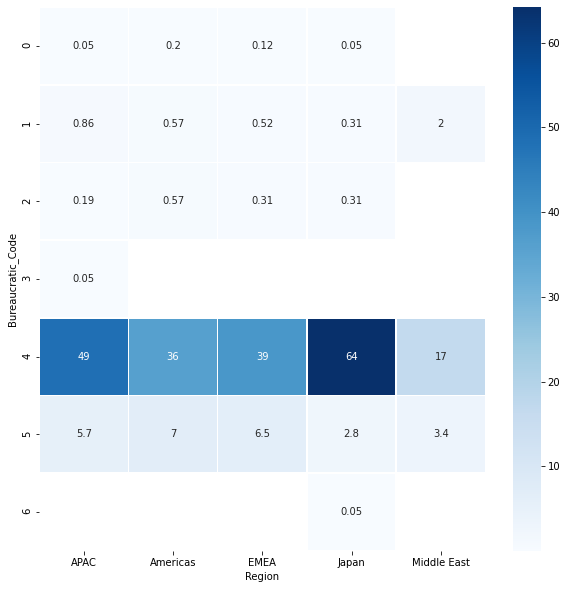

In [93]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pvt_won, annot=True, linewidths=.5, ax=ax, cmap='Blues')

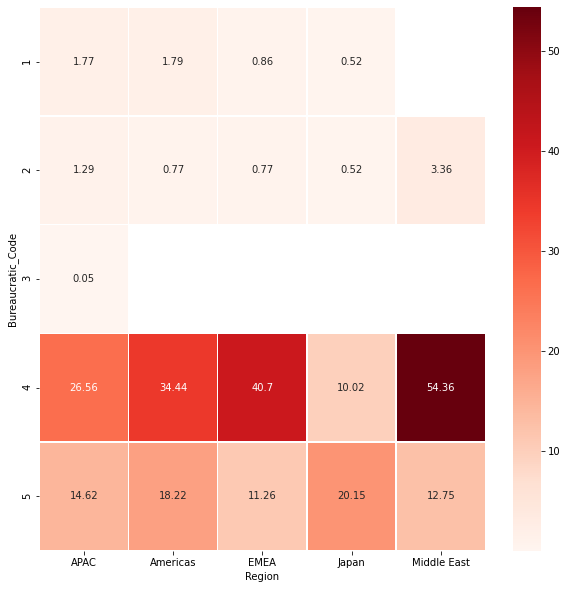

In [78]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pvt_lost, annot=True, linewidths=.5, ax=ax, cmap='Reds', fmt='g')



---

DE AQUI HACIA ABAJO ES BORRADOR (IGNORAR, LO NORMALIZO ANTES DE ENTREGAR)



---



In [103]:
# BORRADOR #####

#x = train.loc[(train["Opportunity_ID"] == 12800) | (train["Opportunity_ID"] == 122)] #122
#x = train[["Opportunity_ID", "Region", "Bureaucratic_Code", "Stage"]]
#x['x'] = x.apply(lambda row: str(row["Bureaucratic_Code"]) + '-' + row["Stage"] + '-' + row["Region"], axis=1)
#x['x'].value_counts()
#train.loc[train["Stage"] == 'Closed Lost']
#train["Bureaucratic_Code_0_Approved"].value_counts()
#train.loc[(train["Stage"] == 'Closed Won') & (train["Bureaucratic_Code_0_Approved"] == 0)]["Bureaucratic_Code_0_Approved"].value_counts()

# Relación de la incidencia del Bureaucratic_Code 
# en la tasa de exito de la oportunidad por Región


In [104]:
# oobtengo el ratio de cada Stage por Region y Bureaucratic_Code

# count_stages_by_region_and_bureau = train.groupby(["Opportunity_ID", "Region", "Bureaucratic_Code", "Stage"])["Stage"].count().to_frame('stage_count').reset_index()
#count_stages_by_region_and_bureau.head(3)
#sum_stages_by_region_and_bureau  = count_stages_by_region_and_bureau.groupby(["Region"])["stage_count"].sum()\
#  .to_frame('stage_sum').reset_index()
#merge_df = count_stages_by_region_and_bureau.merge(sum_stages_by_region_and_bureau)
#merge_df

In [38]:
merge_df["ratio"] = merge_df.apply (lambda row: round(row["stage_count"] / row["stage_sum"] * 100, 2), axis=1)

In [105]:
# Lo primero es que para poder comparar todos los ingresos debo buscar llevarlo 
# a una moneda que pueda hacer la expresión en común de todo los valores
#prospects_stage = train[["Opportunity_ID", "Region", "Delivery_Year", "ASP", "ASP_(converted)", "Total_Amount", "Stage"]].copy()

#prospects_stage["conv_rate"] = prospects_stage["ASP"]/prospects_stage["ASP_(converted)"]
#prospects_stage["Total_Amount_conv"] = prospects_stage["conv_rate"] * prospects_stage["Total_Amount"]

# luego solo nos vamos a enfocar en las oportunidades que alcanzaron a concretarse
#prospects_stage_won = (prospects_stage.loc[prospects_stage["Stage"] == 'Closed Won'])
#group_prospects_stage = prospects_stage.groupby(["Region", "Delivery_Year"])["Total_Amount_conv"].sum().reset_index()

En general vemos un inicio de descenso de ventas efectivas durante el 2017 que se acentua durante el 2018 con un ligero repunte a partir del año 2019. Tambien notamos que este analisis solo tiene un fuerte peso de la región del Japón lo que nos obliga a un segundo analisis separado para las demas regiones

Como era de esperarse el ingreso proveniente de las oportunidades consumadas en la Región de Japón son de un orden tantas veces mayor a la de las demás regiones que nos obliga a visualizar los datos extrayendo el subconjunto de oportunidades en esta región como para poder visualizar la evolución en las demás regiones.
 
En general podemos ver un marcado descenso en los ingresos efectivos e incluso la completa capacidad de venta en las regiones de
Europa, Oriente Medio y África (EMEA) y el medio Ostes de los Estados Unidos a partir del año 2018